![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [2]:
!head data/airbnb_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


The column names are taken from the original documentation for this dataset.

In [51]:
airbnb_df = pd.read_csv('data/airbnb_data.csv', sep=',')

airbnb_df.head()


,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


In [52]:
airbnb_df.describe()

,listing_id,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,1060.000000,1.060000e+03,1060.000000,1060.000000,1017.000000,1060.000000
mean,188418.680189,7.809580e+05,9.534906,78.827358,0.920924,2.324528
std,126514.795934,8.012998e+05,24.985845,87.516805,0.959080,4.291367
min,2539.000000,0.000000e+00,1.000000,0.000000,0.010000,1.000000
25%,63684.000000,2.020110e+05,2.000000,15.000000,0.220000,1.000000
50%,192090.000000,5.731905e+05,3.000000,46.000000,0.590000,1.000000
75%,283113.500000,1.313306e+06,6.000000,115.250000,1.320000,2.000000
max,442649.000000,1.060985e+07,365.000000,480.000000,7.140000,28.000000


In [53]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      1060 non-null   int64  
 1   listing_name                    1060 non-null   object 
 2   host_id                         1060 non-null   int64  
 3   host_name                       1059 non-null   object 
 4   neighbourhood_group             1060 non-null   object 
 5   lat_lon                         1060 non-null   object 
 6   room_type                       1060 non-null   object 
 7   price                           1060 non-null   object 
 8   minimum_nights                  1060 non-null   int64  
 9   number_of_reviews               1060 non-null   int64  
 10  last_review                     1017 non-null   object 
 11  reviews_per_month               1017 non-null   float64
 12  calculated_host_listings_count  10

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [54]:
airbnb_df.set_index('listing_id', inplace=True)
airbnb_df.head()

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [55]:
percent_missing = round(airbnb_df.isna().sum() / airbnb_df.shape[0] * 100, 2)
percent_missing

listing_name                      0.00
host_id                           0.00
host_name                         0.09
neighbourhood_group               0.00
lat_lon                           0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       4.06
reviews_per_month                 4.06
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [56]:
airbnb_df.loc[airbnb_df['reviews_per_month'].isna()] = 0
airbnb_df['reviews_per_month'].isna().sum()

0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [57]:
airbnb_df.dropna(subset=['host_name'], inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [58]:
airbnb_df.dropna(subset=['last_review'], inplace=True)



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [59]:
airbnb_df.drop(airbnb_df[airbnb_df['host_id'] == 0].index, inplace=True)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [60]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], yearfirst=True)
airbnb_df['last_review']

listing_id
2539     2019-10-18
2595     2021-05-19
3831     2005-07-19
5022     2019-11-18
5099     2022-06-19
            ...    
437352   2031-12-18
438513   2016-06-19
439750   2019-05-18
442636   2024-06-19
442649   2022-08-18
Name: last_review, Length: 1003, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [61]:
airbnb_df.drop_duplicates(subset=['listing_name', 'price', 'room_type'], keep='last', inplace=True)



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [62]:
airbnb_df['price'] = airbnb_df['price'].str.replace('$','')
airbnb_df['price'] = airbnb_df['price'].str.replace('.','')
airbnb_df['price'] = airbnb_df['price'].str.replace('-','')
airbnb_df['price'] = airbnb_df['price'].str.replace(',','.')


<ipython-input-62-74b6f7d82831>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('$','')
<ipython-input-62-74b6f7d82831>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('.','')


In [66]:
airbnb_df['price'] = airbnb_df['price'].astype('float64')
airbnb_df['price']

listing_id
2539      149.0
2595      225.0
3831       89.0
5022       80.0
5099      200.0
          ...  
437352    105.0
438513    150.0
439750     55.0
442636     77.0
442649    125.0
Name: price, Length: 983, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [76]:
airbnb_df['neighbourhood'] = (airbnb_df['neighbourhood_group'].str.split(", ")).str[0]
airbnb_df['borough'] = (airbnb_df['neighbourhood_group'].str.split(", ")).str[1]

In [77]:
airbnb_df.drop(columns='neighbourhood_group', inplace=True)

In [78]:
airbnb_df.head()

,listing_name,host_id,host_name,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough
listing_id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,40.64749;-73.97237,Private room,149.0,1,9,2019-10-18,0.21,6,365,Kensington,Brooklyn
2595,Skylit Midtown Castle,2845,Jennifer,40.75362;-73.98377,Entire home/apt,225.0,1,45,2021-05-19,0.38,2,355,Midtown,Manhattan
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514;-73.95976,Entire home/apt,89.0,1,270,2005-07-19,4.64,1,194,Clinton Hill,Brooklyn
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851;-73.94399,Entire home/apt,80.0,10,9,2019-11-18,0.10,1,0,East Harlem,Manhattan
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,40.74767;-73.975,Entire home/apt,200.0,3,74,2022-06-19,0.59,1,129,Murray Hill,Manhattan


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [82]:
airbnb_df['latitude'] = (airbnb_df['lat_lon'].str.split(";")).str[0].astype('float64')
airbnb_df['longitude'] = (airbnb_df['lat_lon'].str.split(";")).str[1].astype('float64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 2539 to 442649
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_name                    983 non-null    object        
 1   host_id                         983 non-null    int64         
 2   host_name                       983 non-null    object        
 3   lat_lon                         983 non-null    object        
 4   room_type                       983 non-null    object        
 5   price                           983 non-null    float64       
 6   minimum_nights                  983 non-null    int64         
 7   number_of_reviews               983 non-null    int64         
 8   last_review                     983 non-null    datetime64[ns]
 9   reviews_per_month               983 non-null    float64       
 10  calculated_host_listings_count  983 non-null    int64         
 11  

In [84]:
airbnb_df.drop(columns=['lat_lon'], inplace=True)

#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

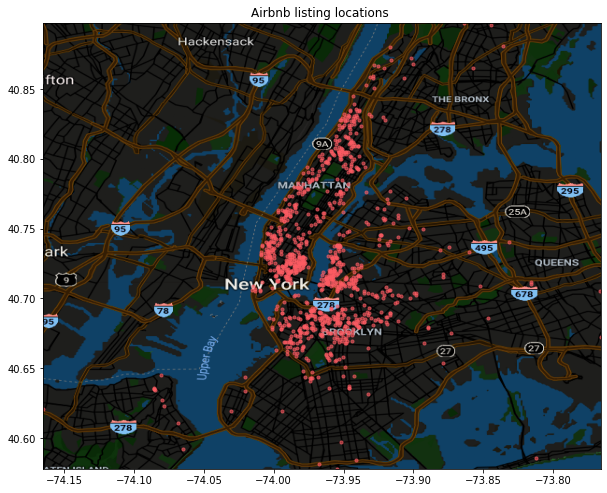

In [85]:
longlat_min_max = (airbnb_df.longitude.min(), airbnb_df.longitude.max(), airbnb_df.latitude.min(), airbnb_df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(airbnb_df.longitude, airbnb_df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [86]:
airbnb_df['availability_365'].unique()

array(['365', '355', '194', '0', '129', '220', '188', '6', '39', '314',
       '46', '321', '12', '21', '347', '364', '304', '233', '85', '75',
       '311', '67', '255', '284', '359', '269', '340', '22', '96', '345',
       '273', '3454', '95', '215', '265', '192', '251', '302', '140',
       '234', '257', '30', '301', '294', '320', '154', '5234', '180',
       '231', '297', '292', '191', '72', '362', '336', '116', '88', '224',
       '322', '324', '132', '295', '238', '209', '328', '7', '272', '26',
       '288', '317', '207', '185', '158', '9', '198', '219', '342', '312',
       '243', '152', '137', '222', '346', '208', '279', '250', '164',
       '298', '260', '107', '199', '299', '20', '318', '216', '245',
       '189', '307', '310', '213', '278', '16', '178', '275', '163', '34',
       '280', '1', '170', '214', '248', '262', '339', '10', '290', '230',
       '53', '126', '3', '37', '353', '177', '1111', '246', '225', '18',
       '343', '326', '162', '240', '363', '247', '323', '

In [97]:
airbnb_df['availability_365'] = pd.to_numeric(airbnb_df['availability_365'], errors='coerce')
airbnb_df.dropna(subset=['availability_365'], inplace=True)

In [105]:
airbnb_df.drop(airbnb_df[airbnb_df['availability_365'] > 365].index, inplace=True )
airbnb_df['availability_365'].max()

365.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [114]:
most_reviews = airbnb_df.groupby(['host_name'])['reviews_per_month'].sum().sort_values(ascending=False).head(10)

#### Visualizing most_reviews

Text(0, 0.5, '')

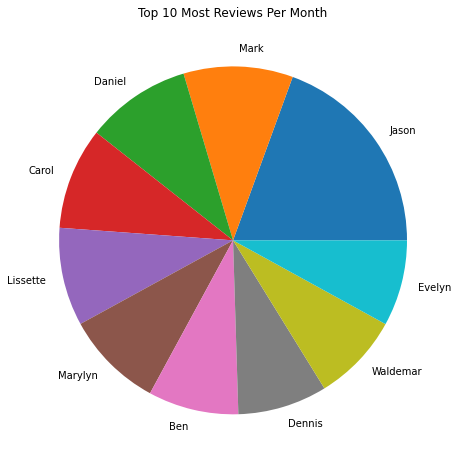

In [115]:
most_reviews.plot(kind='pie',figsize=(8, 8))

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [123]:
expensive_listings = airbnb_df['price'].sort_values(ascending=False).head(100)

In [134]:
expensive_listings_df = airbnb_df.loc[expensive_listings.index]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [135]:
expensive_listings_df['neighbourhood'].value_counts()

Chelsea               9
Williamsburg          9
East Village          7
Greenpoint            7
West Village          7
Harlem                7
Upper West Side       5
Nolita                5
Clinton Hill          4
Carroll Gardens       4
Midtown               3
Upper East Side       3
Bedford-Stuyvesant    3
Hell's Kitchen        3
Lower East Side       2
Boerum Hill           2
South Slope           2
Park Slope            2
SoHo                  2
Prospect Heights      1
Flatiron District     1
Washington Heights    1
Little Italy          1
Chinatown             1
DUMBO                 1
Brooklyn Heights      1
Middle Village        1
Financial District    1
Flatbush              1
Ridgewood             1
Greenwich Village     1
Gramercy              1
Gowanus               1
Name: neighbourhood, dtype: int64

#### Visualizing neighbourhoods

<AxesSubplot:>

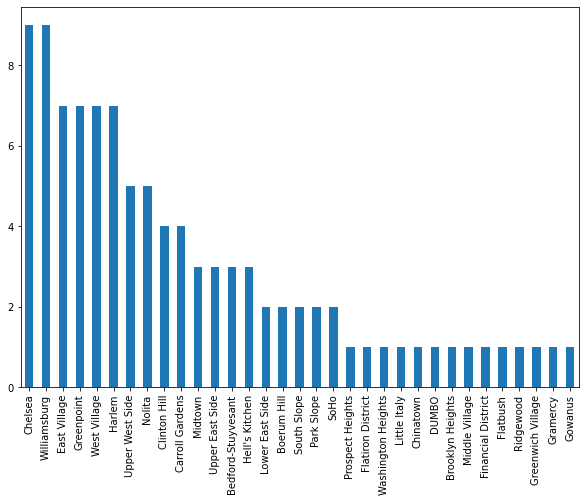

In [136]:
expensive_listings_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(10,7))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [138]:
airbnb_df['neighbourhood'].value_counts().head(10)

Williamsburg          110
Harlem                 74
Bedford-Stuyvesant     72
East Village           65
Upper West Side        44
Greenpoint             42
West Village           33
Crown Heights          32
Hell's Kitchen         30
Park Slope             27
Name: neighbourhood, dtype: int64

#### Visualizing neighbourhoods

<AxesSubplot:>

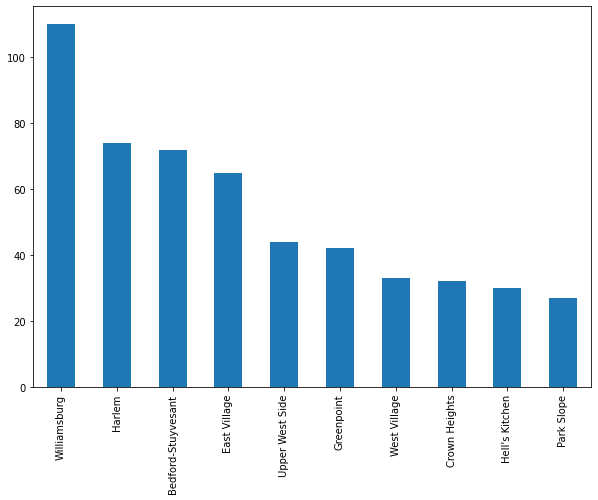

In [139]:
airbnb_df['neighbourhood'].value_counts().head(10).plot(kind='bar', figsize=(10,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)